# Sales Prediction

### By - Varnica Sharma

## Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

### Analyzing and pre-processing the data

In [2]:
df = pd.read_csv("data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Checking for missing values

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [8]:
corr = df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [9]:
df["Sales"].value_counts()

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

### Splitting the data for Training and Testing

In [10]:
np.random.seed(42)

x = df[["TV", "Radio", "Newspaper"]]
y = df[["Sales"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
x.shape, x_train.shape, x_test.shape

((200, 3), (160, 3), (40, 3))

### Data Visualization

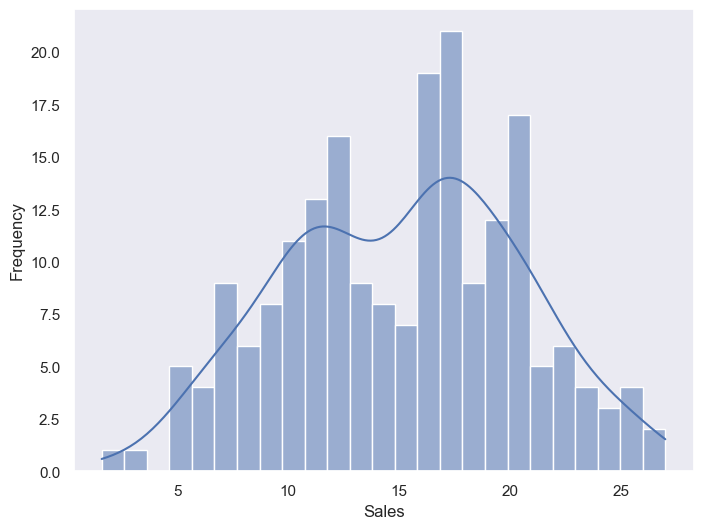

In [12]:
sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.histplot(df["Sales"], bins=25, kde=True)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

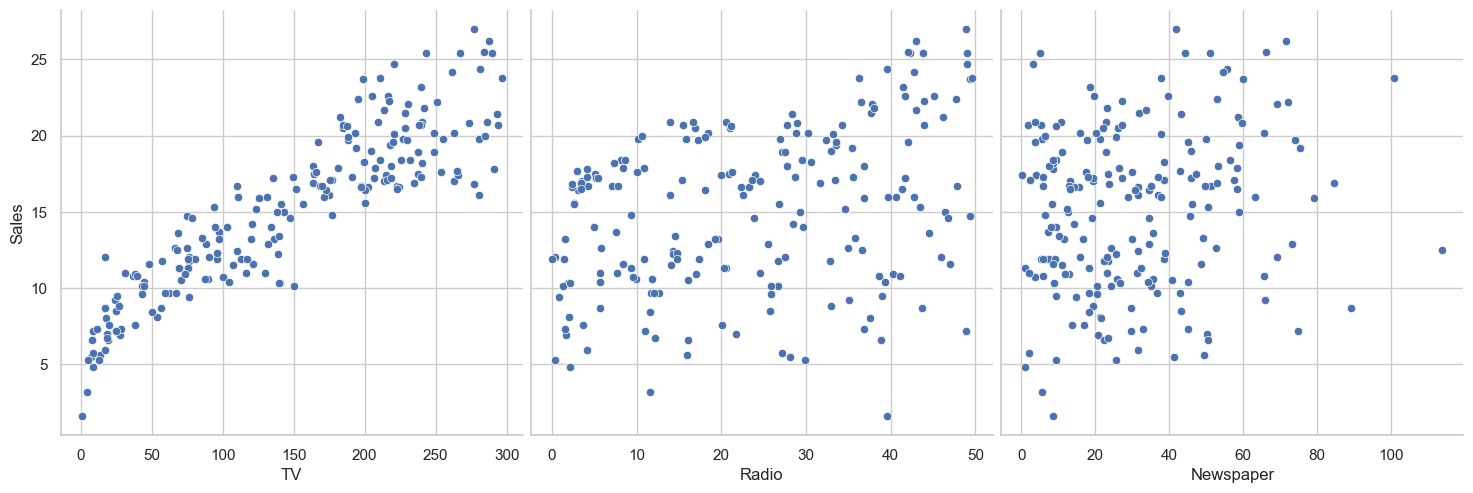

In [13]:
sns.set(style="whitegrid")
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", height=5, aspect=1)
plt.show()

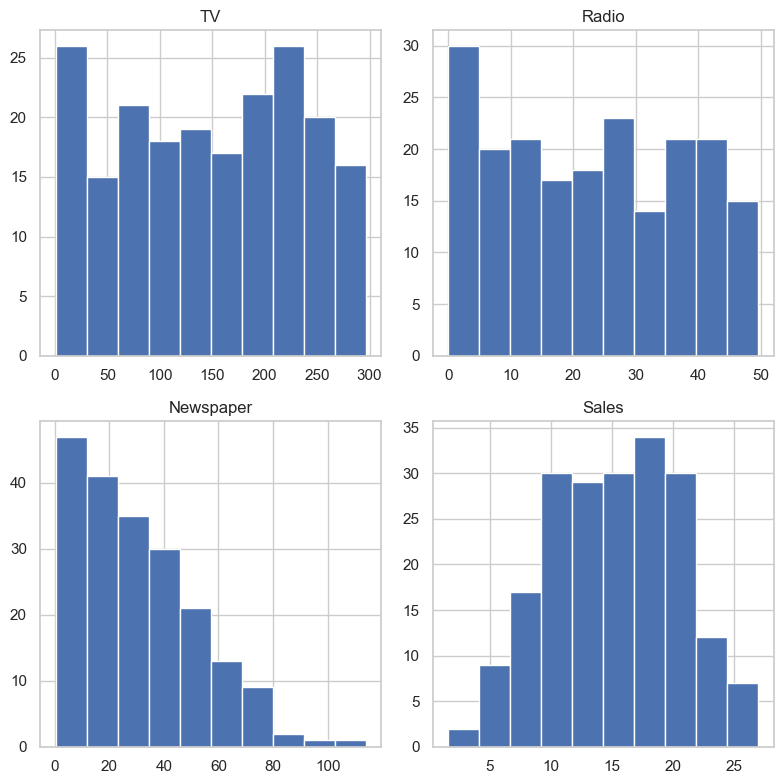

In [14]:
df.hist(bins=10, figsize=(8,8))
plt.tight_layout()
plt.show()

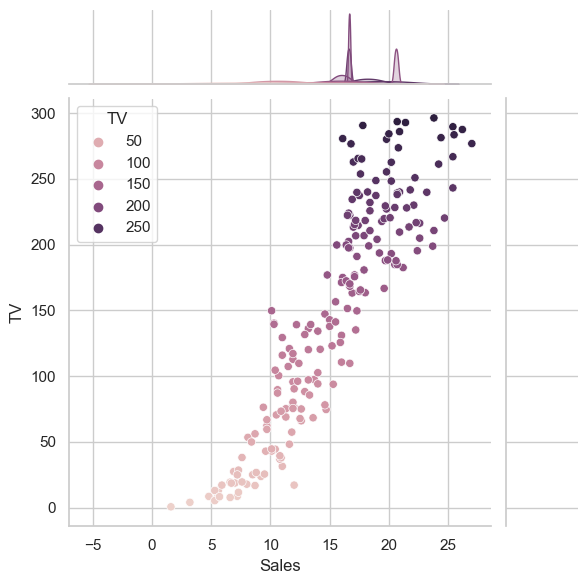

In [15]:
sns.jointplot(x="Sales", y="TV", hue="TV", data=df, color="pink");

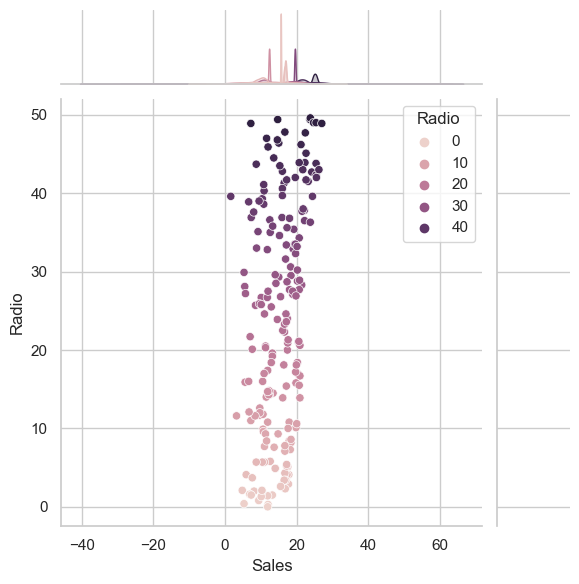

In [16]:
sns.jointplot(x="Sales", y="Radio", hue="Radio", data=df, color="pink");

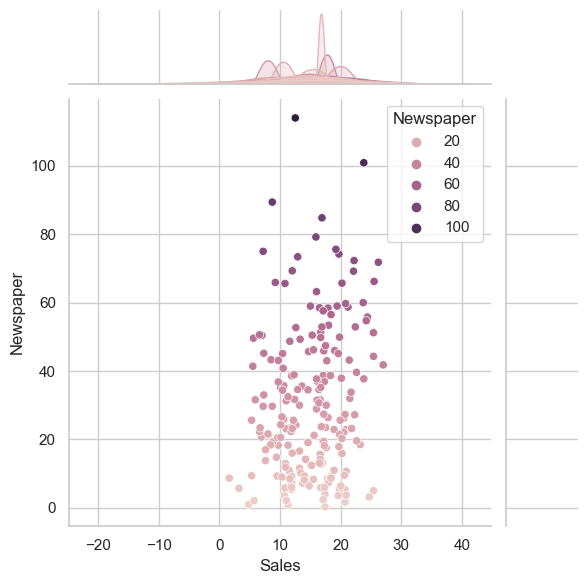

In [17]:
sns.jointplot(x="Sales", y="Newspaper", hue="Newspaper", data=df, color="pink");

### Training the model using LinearRegression()

In [18]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)

**Mean Square Error**

In [23]:
mse = mean_squared_error(y_test, y_pred)
mse

2.9077569102710905

**Coefficient of Determination**

In [24]:
r2 = r2_score(y_test, y_pred)
r2

0.9059011844150826

### Training the model using RandomForestRegressor()

In [25]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
y_pred = model.predict(x_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
mse

1.4374328500000009

In [29]:
r2 = r2_score(y_test, y_pred)

0.9534827934927883